# Einstein Summation & the Symmetry of the Dot Product — A Gentle, Practical Intro

**Version notes:** 2025-08-24  
**Audience:** beginner-friendly, assumes basic Python & NumPy knowledge  
**Goal:** Demystify Einstein's summation convention and show how it connects matrix multiplication to the dot product and geometric projection

## Why This Matters

Einstein summation notation is more than just mathematical shorthand—it's a powerful way to think about linear algebra operations that will make you a better machine learning practitioner. You'll see this notation in:
- Deep learning frameworks (PyTorch, TensorFlow)
- Advanced NumPy operations
- Mathematical literature on neural networks
- Tensor operations in physics and engineering

**What makes this tutorial different:**  
- We start with concrete examples using small matrices you can easily verify by hand
- Every concept is demonstrated with three approaches: mathematical notation, Python loops, and NumPy functions
- We emphasize the geometric intuition behind the operations

**Prerequisites:**  
- Basic Python programming
- Familiarity with NumPy arrays
- Understanding of matrix-vector multiplication (we'll review this)

**Attribution:** Adapted from the user's notes: *"Einstein summation convention and the symmetry of the dot product."*

## Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand Einstein summation convention**
   - Recognize when repeated indices imply summation
   - Write matrix operations using index notation
   - Convert between explicit sums and Einstein notation

2. **Master matrix multiplication from multiple perspectives**
   - Implement matrix multiplication using nested loops
   - Use `numpy.einsum` for flexible tensor operations
   - Predict output shapes for matrix products

3. **Connect abstract operations to geometric intuition**
   - Relate the dot product to matrix multiplication (u^T v)
   - Understand why the dot product is symmetric (u·v = v·u)
   - Visualize dot products as projections

4. **Apply these concepts practically**
   - Write efficient NumPy code using `einsum`
   - Debug matrix dimension errors
   - Use geometric intuition to check your work

Let's start with a quick review of what we'll be building up to...

## The Big Picture: From Sums to Geometry

Before we dive into the notation, let's understand what we're building toward:

### The Journey We'll Take
1. **Start with familiar matrix multiplication** - Review what you already know
2. **Introduce Einstein notation** - A cleaner way to write the same operations  
3. **Connect to dot products** - See how vector operations fit the pattern
4. **Reveal the geometry** - Understand why these operations have symmetric properties

### Key Insight Preview
The dot product u·v can be written as matrix multiplication u^T v, and this connection reveals why:
- The dot product is symmetric: u·v = v·u
- Matrix multiplication follows predictable shape rules
- Geometric projections emerge naturally from algebraic operations

Think of Einstein notation as a "zoom out" view—instead of getting lost in the details of individual array elements, we focus on the patterns of how indices combine and cancel out.

---

## Prerequisites & setup
We only need NumPy and Matplotlib. If Matplotlib is unavailable, plots are skipped gracefully.


In [1]:
# Essential imports for our exploration
import numpy as np

# Optional plotting for visualizations
try:
    import matplotlib.pyplot as plt
    HAS_PLT = True
    print("✓ Matplotlib available - we'll create visualizations")
except ImportError as e:
    HAS_PLT = False
    print("⚠ Matplotlib not available - visualizations will be skipped")
    print(f"  Error: {e}")

# Configure NumPy for cleaner output
np.set_printoptions(precision=3, suppress=True, linewidth=80)

# Let's verify our setup with a simple test
test_array = np.array([[1, 2], [3, 4]])
print(f"\nNumPy is working! Test array:\n{test_array}")
print(f"Array shape: {test_array.shape}")
print(f"Array data type: {test_array.dtype}")

# Set random seed for reproducible examples
np.random.seed(42)
print("\n✓ Setup complete! Random seed set to 42 for reproducible results.")

✓ Matplotlib available - we'll create visualizations

NumPy is working! Test array:
[[1 2]
 [3 4]]
Array shape: (2, 2)
Array data type: int64

✓ Setup complete! Random seed set to 42 for reproducible results.


## Understanding Index Notation and Einstein's Brilliant Shortcut

### Traditional Index Notation
In linear algebra, we often need to specify exactly which element of a matrix we're talking about:
- For a matrix **A**, we write **A_{ij}** where **i = row index** and **j = column index**
- Python equivalent: `A[i, j]`

### Matrix Multiplication the Long Way
When we multiply two matrices C = AB, each element of the result is computed as:

$$C_{ik} = \sum_{j=1}^{n} A_{ij} \cdot B_{jk}$$

This means: "To get element (i,k) of C, multiply corresponding elements from row i of A and column k of B, then sum them all up."

### Einstein's Genius Insight
Einstein noticed that writing the summation symbol (Σ) over and over was redundant. He introduced this rule:

> **When an index appears exactly twice in a term, we automatically sum over it.**

So instead of writing:  $$C_{ik} = \sum_{j} A_{ij} B_{jk}$$

We simply write:  $$C_{ik} = A_{ij} B_{jk}$$

The index **j** appears twice (once in each matrix), so we sum over it. The indices **i** and **k** appear once each, so they remain as free indices determining the output shape.

### A Concrete Example
Let's see this with actual numbers:

In [2]:
# Let's make Einstein notation concrete with a tiny example
# We'll multiply a 2x2 matrix with a 2x3 matrix

A = np.array([[1, 2],      # 2 rows, 2 columns
              [3, 4]])

B = np.array([[5, 6, 7],   # 2 rows, 3 columns  
              [8, 9, 10]])

print("Matrix A (2×2):")
print(A)
print("\nMatrix B (2×3):")
print(B)

# Let's compute C[0,0] step by step to see the summation
# C[0,0] = A[0,0]*B[0,0] + A[0,1]*B[1,0]
c_00_manual = A[0,0]*B[0,0] + A[0,1]*B[1,0]
print(f"\nComputing C[0,0] manually:")
print(f"C[0,0] = A[0,0]×B[0,0] + A[0,1]×B[1,0]")
print(f"C[0,0] = {A[0,0]}×{B[0,0]} + {A[0,1]}×{B[1,0]} = {c_00_manual}")

# Now let's compute the full matrix multiplication
C = A @ B
print(f"\nFull result C = A @ B:")
print(C)
print(f"C[0,0] from full multiplication: {C[0,0]} ✓")

# In Einstein notation: C_ik = A_ij * B_jk
# The j index is repeated, so we sum over j (j goes from 0 to 1 in this case)
print(f"\nResult shape: {A.shape} @ {B.shape} → {C.shape}")
print("Notice: inner dimension (2) disappears, outer dimensions (2,3) remain")

Matrix A (2×2):
[[1 2]
 [3 4]]

Matrix B (2×3):
[[ 5  6  7]
 [ 8  9 10]]

Computing C[0,0] manually:
C[0,0] = A[0,0]×B[0,0] + A[0,1]×B[1,0]
C[0,0] = 1×5 + 2×8 = 21

Full result C = A @ B:
[[21 24 27]
 [47 54 61]]
C[0,0] from full multiplication: 21 ✓

Result shape: (2, 2) @ (2, 3) → (2, 3)
Notice: inner dimension (2) disappears, outer dimensions (2,3) remain


## Matrix Multiplication: Three Equivalent Approaches

Now that we understand the concept, let's implement matrix multiplication in three different ways to solidify our understanding:

1. **Triple nested loops** - The most explicit way, showing every step
2. **NumPy's `@` operator** - The standard, optimized approach  
3. **`np.einsum`** - Einstein notation in code form

Each method produces identical results, but `einsum` will give us the most insight into the underlying tensor operations that power modern machine learning frameworks.

### Why Learn All Three?
- **Loops**: Help you understand what's actually happening computationally
- **`@` operator**: What you'll use in practice for standard matrix multiplication
- **`einsum`**: Essential for complex tensor operations in deep learning

Let's verify they all produce the same results:

In [3]:
def matmul_triple_loop(A, B):
    """
    Matrix multiplication using explicit triple loops.
    
    This implementation shows exactly what happens in matrix multiplication:
    - For each output position (i, k)
    - Sum over all j: A[i,j] * B[j,k]
    
    Args:
        A: Matrix of shape (m, n)
        B: Matrix of shape (n, p)
    
    Returns:
        C: Matrix of shape (m, p) where C[i,k] = sum_j(A[i,j] * B[j,k])
    """
    A = np.asarray(A, dtype=float)
    B = np.asarray(B, dtype=float)
    
    m, n = A.shape
    n2, p = B.shape
    
    # Check dimensional compatibility
    if n != n2:
        raise ValueError(f"Cannot multiply {A.shape} @ {B.shape}: "
                        f"inner dimensions {n} ≠ {n2}")
    
    # Initialize result matrix
    C = np.zeros((m, p), dtype=float)
    
    # Triple nested loops implementing C[i,k] = sum_j(A[i,j] * B[j,k])
    for i in range(m):           # For each row of A (and C)
        for k in range(p):       # For each column of B (and C)
            accumulator = 0.0
            for j in range(n):   # Sum over the shared dimension
                accumulator += A[i, j] * B[j, k]
            C[i, k] = accumulator
    
    return C

# Test with a non-square example to emphasize shape rules
print("Testing matrix multiplication with shape (2×3) @ (3×4) → (2×4)")

A = np.array([[1, 2, 3],      # 2 rows, 3 columns
              [4, 5, 6]])

B = np.array([[7,  8,  9, 10], # 3 rows, 4 columns
              [11, 12, 13, 14],
              [15, 16, 17, 18]])

print(f"\nA shape: {A.shape}")
print(f"A =\n{A}")
print(f"\nB shape: {B.shape}")  
print(f"B =\n{B}")

# Compare all three approaches
C_loop   = matmul_triple_loop(A, B)
C_dot    = A @ B
C_einsum = np.einsum('ij,jk->ik', A, B)

print(f"\nResult shape: {C_loop.shape}")
print(f"\nResults comparison:")
print(f"Loop method matches @:      {np.allclose(C_loop, C_dot)}")
print(f"@ method matches einsum:    {np.allclose(C_dot, C_einsum)}")
print(f"All three methods identical: {np.allclose(C_loop, C_einsum)}")

print(f"\nFinal result C = A @ B:")
print(C_dot)

# Let's verify one element manually to build intuition
i, k = 0, 1  # First row, second column
manual_calc = A[0,0]*B[0,1] + A[0,1]*B[1,1] + A[0,2]*B[2,1]
print(f"\nManual verification of C[{i},{k}]:")
print(f"C[{i},{k}] = A[{i},0]×B[0,{k}] + A[{i},1]×B[1,{k}] + A[{i},2]×B[2,{k}]")
print(f"C[{i},{k}] = {A[0,0]}×{B[0,1]} + {A[0,1]}×{B[1,1]} + {A[0,2]}×{B[2,1]} = {manual_calc}")
print(f"From matrix multiplication: C[{i},{k}] = {C_dot[i,k]} ✓")

Testing matrix multiplication with shape (2×3) @ (3×4) → (2×4)

A shape: (2, 3)
A =
[[1 2 3]
 [4 5 6]]

B shape: (3, 4)
B =
[[ 7  8  9 10]
 [11 12 13 14]
 [15 16 17 18]]

Result shape: (2, 4)

Results comparison:
Loop method matches @:      True
@ method matches einsum:    True
All three methods identical: True

Final result C = A @ B:
[[ 74  80  86  92]
 [173 188 203 218]]

Manual verification of C[0,1]:
C[0,1] = A[0,0]×B[0,1] + A[0,1]×B[1,1] + A[0,2]×B[2,1]
C[0,1] = 1×8 + 2×12 + 3×16 = 80
From matrix multiplication: C[0,1] = 80 ✓


### Decoding `np.einsum('ij,jk->ik', A, B)`

Let's break down this powerful notation step by step:

#### The Pattern: `'inputs->output'`
- **Before the arrow (`ij,jk`)**: Describes the input arrays' indices
- **After the arrow (`->ik`)**: Describes the output array's indices  
- **Comma (`,`)**: Separates different input arrays

#### Reading `'ij,jk->ik'`
1. **First array `A`**: has indices `i` (rows) and `j` (columns)
2. **Second array `B`**: has indices `j` (rows) and `k` (columns)  
3. **Output array `C`**: will have indices `i` and `k`

#### The Einstein Magic
- **Index `j` appears twice** (once in each input) → **sum over j**
- **Indices `i` and `k` appear once** → **keep as free indices** in output

This is exactly the mathematical expression: **C_{ik} = A_{ij} B_{jk}**

#### Why This Matters for Deep Learning
- `einsum` can handle arbitrary tensor contractions
- Essential for attention mechanisms, tensor networks, and custom operations
- More flexible than `@` for multi-dimensional arrays
- Often more readable than nested loops for complex operations

Let's see a few more `einsum` examples to build intuition:

In [4]:
# More einsum examples to build intuition
print("🔍 Exploring different einsum operations\n")

# Create some test arrays
vec = np.array([1, 2, 3])           # Shape: (3,)
mat = np.array([[1, 2], [3, 4]])    # Shape: (2, 2)

print("Test vector:", vec)
print("Test matrix:\n", mat)

print("\n" + "="*50)
print("EINSUM OPERATION EXAMPLES")
print("="*50)

# Example 1: Element-wise sum of a vector (trace-like operation for 1D)
sum_all = np.einsum('i->', vec)
print(f"1. Sum all elements:     einsum('i->', vec) = {sum_all}")
print(f"   Equivalent to:        np.sum(vec) = {np.sum(vec)}")

# Example 2: Outer product
outer = np.einsum('i,j->ij', vec, vec)
print(f"\n2. Outer product:       einsum('i,j->ij', vec, vec)")
print(f"   Shape: {vec.shape} × {vec.shape} → {outer.shape}")
print(f"   Result:\n{outer}")
print(f"   Equivalent to:        np.outer(vec, vec)")

# Example 3: Matrix trace (sum of diagonal elements)
trace = np.einsum('ii->', mat)
print(f"\n3. Matrix trace:        einsum('ii->', mat) = {trace}")
print(f"   Equivalent to:        np.trace(mat) = {np.trace(mat)}")
print(f"   Note: repeated 'i' means sum over diagonal!")

# Example 4: Matrix transpose
transpose = np.einsum('ij->ji', mat)
print(f"\n4. Matrix transpose:    einsum('ij->ji', mat)")
print(f"   Original shape: {mat.shape} → Transposed shape: {transpose.shape}")
print(f"   Result:\n{transpose}")
print(f"   Equivalent to:        mat.T")

# Example 5: Element-wise multiplication (Hadamard product)
hadamard = np.einsum('ij,ij->ij', mat, mat)
print(f"\n5. Element-wise mult:   einsum('ij,ij->ij', mat, mat)")
print(f"   Result:\n{hadamard}")
print(f"   Equivalent to:        mat * mat")

print(f"\n💡 Key insight: The arrow '->' explicitly shows what indices survive!")
print(f"   No arrow means all indices are summed away (like a total sum)")
print(f"   Repeated indices are always summed (Einstein convention)")
print(f"   Free indices (appearing once) become output dimensions")

🔍 Exploring different einsum operations

Test vector: [1 2 3]
Test matrix:
 [[1 2]
 [3 4]]

EINSUM OPERATION EXAMPLES
1. Sum all elements:     einsum('i->', vec) = 6
   Equivalent to:        np.sum(vec) = 6

2. Outer product:       einsum('i,j->ij', vec, vec)
   Shape: (3,) × (3,) → (3, 3)
   Result:
[[1 2 3]
 [2 4 6]
 [3 6 9]]
   Equivalent to:        np.outer(vec, vec)

3. Matrix trace:        einsum('ii->', mat) = 5
   Equivalent to:        np.trace(mat) = 5
   Note: repeated 'i' means sum over diagonal!

4. Matrix transpose:    einsum('ij->ji', mat)
   Original shape: (2, 2) → Transposed shape: (2, 2)
   Result:
[[1 3]
 [2 4]]
   Equivalent to:        mat.T

5. Element-wise mult:   einsum('ij,ij->ij', mat, mat)
   Result:
[[ 1  4]
 [ 9 16]]
   Equivalent to:        mat * mat

💡 Key insight: The arrow '->' explicitly shows what indices survive!
   No arrow means all indices are summed away (like a total sum)
   Repeated indices are always summed (Einstein convention)
   Free indices

## The Dot Product: Where Algebra Meets Geometry

The dot product is a fundamental operation that bridges abstract linear algebra with concrete geometric intuition. Let's explore its multiple personalities:

### Three Equivalent Definitions

For vectors **u**, **v** ∈ ℝⁿ:

1. **Algebraic definition**: u · v = ∑ᵢ uᵢvᵢ (sum of element-wise products)

2. **Matrix multiplication view**: u · v = u^T v (1×n matrix times n×1 matrix)

3. **Geometric definition**: u · v = ||u|| ||v|| cos(θ) (magnitudes times cosine of angle)

### The Beautiful Symmetry

The dot product is **commutative**: u · v = v · u

This isn't just an algebraic accident—it reflects a deep geometric truth:
- The projection of u onto v has the same "signed length" as the projection of v onto u
- Both measure how much the vectors "point in the same direction"

### Why This Matters in Machine Learning
- **Similarity**: Dot products measure how similar two vectors are
- **Neural networks**: Each neuron computes dot products between inputs and weights  
- **Attention mechanisms**: Use dot products to compute relevance scores
- **Principal Component Analysis**: Projects data using dot products with eigenvectors

Let's verify these equivalences with code:

In [5]:
# Demonstrating dot product equivalences and geometric intuition
print("🔍 Exploring the dot product from multiple angles\n")

# Create two meaningful vectors for geometric intuition
u = np.array([3.0, 4.0])  # Vector pointing mostly right and up
v = np.array([1.0, 2.0])  # Vector pointing right and up (different direction)

print(f"Vector u = {u}")
print(f"Vector v = {v}")

# Method 1: Element-wise multiplication and sum (algebraic definition)
dot_algebraic = np.sum(u * v)
print(f"\n1. Algebraic: sum(u * v) = sum({u * v}) = {dot_algebraic}")

# Method 2: Using np.dot (the standard way)
dot_builtin = np.dot(u, v)
print(f"2. Built-in: np.dot(u, v) = {dot_builtin}")

# Method 3: Matrix multiplication view (u^T @ v)
dot_matmul = u.reshape(1, -1) @ v.reshape(-1, 1)
dot_matmul_scalar = dot_matmul[0, 0]  # Extract scalar from 1x1 matrix
print(f"3. Matrix mult: u^T @ v = {dot_matmul_scalar}")

# Method 4: Einstein summation 
dot_einsum = np.einsum('i,i->', u, v)
print(f"4. Einstein: einsum('i,i->', u, v) = {dot_einsum}")

# Verify symmetry: u·v = v·u
dot_symmetric = np.dot(v, u)
print(f"\n🔄 Symmetry check:")
print(f"   u·v = {dot_builtin}")
print(f"   v·u = {dot_symmetric}")
print(f"   Symmetric? {np.isclose(dot_builtin, dot_symmetric)} ✓")

# Geometric interpretation
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
cos_theta = dot_builtin / (norm_u * norm_v)
theta_radians = np.arccos(cos_theta)
theta_degrees = np.degrees(theta_radians)

print(f"\n📐 Geometric interpretation:")
print(f"   ||u|| = {norm_u:.3f}")
print(f"   ||v|| = {norm_v:.3f}")
print(f"   cos(θ) = {cos_theta:.3f}")
print(f"   θ = {theta_degrees:.1f} degrees")

# Verify geometric formula: u·v = ||u|| ||v|| cos(θ)
dot_geometric = norm_u * norm_v * cos_theta
print(f"   ||u|| ||v|| cos(θ) = {dot_geometric:.3f}")
print(f"   Matches algebraic result? {np.isclose(dot_builtin, dot_geometric)} ✓")

# Projections
proj_u_onto_v = (dot_builtin / (norm_v**2)) * v
proj_v_onto_u = (dot_builtin / (norm_u**2)) * u

print(f"\n📏 Projections:")
print(f"   Projection of u onto v: {proj_u_onto_v}")
print(f"   Length of projection: {np.linalg.norm(proj_u_onto_v):.3f}")
print(f"   Alternative calculation: |u| cos(θ) = {norm_u * cos_theta:.3f} ✓")

print(f"\n💡 Key insight: All methods give the same result!")
print(f"   This shows the deep connection between algebra and geometry.")

🔍 Exploring the dot product from multiple angles

Vector u = [3. 4.]
Vector v = [1. 2.]

1. Algebraic: sum(u * v) = sum([3. 8.]) = 11.0
2. Built-in: np.dot(u, v) = 11.0
3. Matrix mult: u^T @ v = 11.0
4. Einstein: einsum('i,i->', u, v) = 11.0

🔄 Symmetry check:
   u·v = 11.0
   v·u = 11.0
   Symmetric? True ✓

📐 Geometric interpretation:
   ||u|| = 5.000
   ||v|| = 2.236
   cos(θ) = 0.984
   θ = 10.3 degrees
   ||u|| ||v|| cos(θ) = 11.000
   Matches algebraic result? True ✓

📏 Projections:
   Projection of u onto v: [2.2 4.4]
   Length of projection: 4.919
   Alternative calculation: |u| cos(θ) = 4.919 ✓

💡 Key insight: All methods give the same result!
   This shows the deep connection between algebra and geometry.


## Projection & Symmetry: The Geometric Heart of the Dot Product

The dot product's symmetry (u·v = v·u) might seem like just an algebraic property, but it has a beautiful geometric interpretation through **projections**.

### What is a Projection?
When you project vector **u** onto vector **v**, you're asking: *"How much of u points in the direction of v?"*

Mathematically, the projection of **u** onto **v** is:
$$\text{proj}_v(u) = \frac{u \cdot v}{||v||^2} \cdot v$$

The **length** of this projection is:
$$||\text{proj}_v(u)|| = \frac{|u \cdot v|}{||v||} = ||u|| |\cos\theta|$$

### The Symmetry Revelation
Here's the beautiful insight: while the projection **vectors** are different, the **scalar projections** are related:

- Projection of u onto v has length: ||u|| cos(θ)  
- Projection of v onto u has length: ||v|| cos(θ)
- Their **dot product relationship**: u·v = ||u|| ||v|| cos(θ) = (||u|| cos(θ)) · ||v|| = ||u|| · (||v|| cos(θ))

This means u·v can be interpreted as:
- "Length of u's projection onto v" × "length of v"
- "Length of v's projection onto u" × "length of u"

Both interpretations give the same result—that's the symmetry!

Let's visualize this beautiful symmetry:

🎯 Projection Analysis
Vector u = [4. 2.]
Vector v = [1. 3.]

Dot product u·v = 10.0
Projection of u onto v: [1. 3.]
Length of proj(u onto v): 3.162
Projection of v onto u: [2. 1.]
Length of proj(v onto u): 2.236

🔄 Symmetry verification:
u·v = 10.0
|u| × length(proj(v onto u)) = 4.472 × 2.236 = 10.000
|v| × length(proj(u onto v)) = 3.162 × 3.162 = 10.000


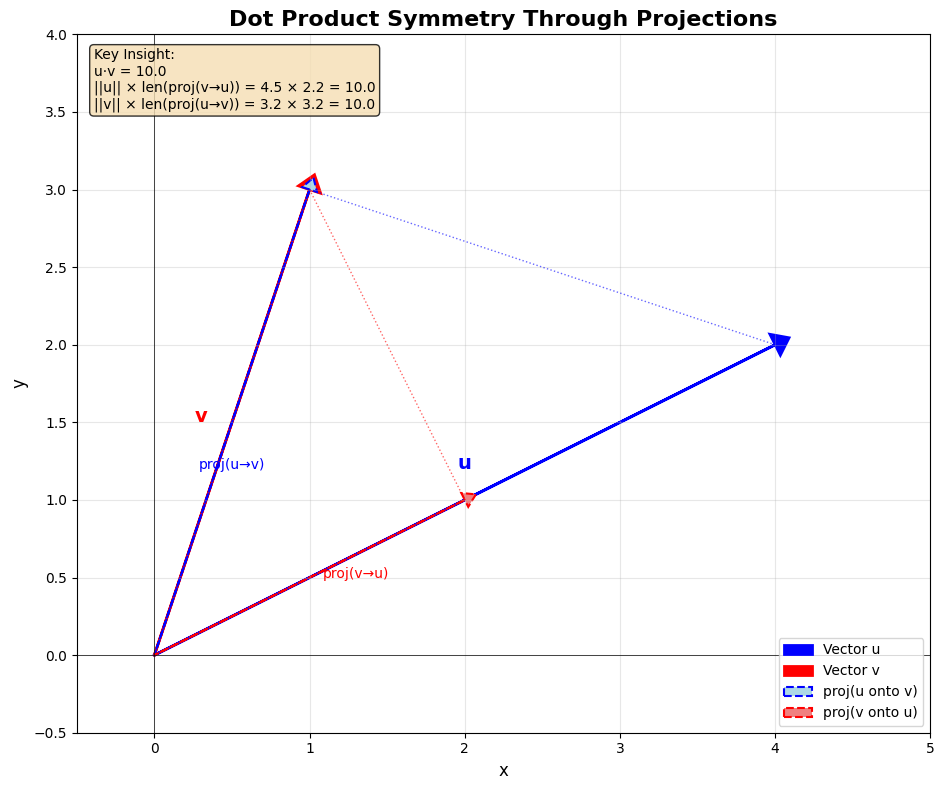


💡 What the visualization shows:
   • Both projections give the same dot product when scaled appropriately
   • The dotted lines show how we 'drop perpendiculars' to create projections
   • Different projection vectors, same scalar relationship!


In [6]:
# Visualizing the symmetry of dot products through projections

def unit_vector(v):
    """Return unit vector in direction of v"""
    v = np.asarray(v, dtype=float)
    norm = np.linalg.norm(v)
    return v / norm if norm > 0 else v

# Create two vectors that will show clear projections
u = np.array([4.0, 2.0])  # Vector pointing mostly right
v = np.array([1.0, 3.0])  # Vector pointing mostly up

print("🎯 Projection Analysis")
print(f"Vector u = {u}")
print(f"Vector v = {v}")

# Calculate projections
u_dot_v = np.dot(u, v)
proj_u_onto_v = (u_dot_v / np.dot(v, v)) * v
proj_v_onto_u = (u_dot_v / np.dot(u, u)) * u

# Calculate projection lengths
len_proj_u_onto_v = np.linalg.norm(proj_u_onto_v)
len_proj_v_onto_u = np.linalg.norm(proj_v_onto_u)

print(f"\nDot product u·v = {u_dot_v}")
print(f"Projection of u onto v: {proj_u_onto_v}")
print(f"Length of proj(u onto v): {len_proj_u_onto_v:.3f}")
print(f"Projection of v onto u: {proj_v_onto_u}")  
print(f"Length of proj(v onto u): {len_proj_v_onto_u:.3f}")

# Verify the symmetry relationships
norm_u = np.linalg.norm(u)
norm_v = np.linalg.norm(v)
print(f"\n🔄 Symmetry verification:")
print(f"u·v = {u_dot_v}")
print(f"|u| × length(proj(v onto u)) = {norm_u:.3f} × {len_proj_v_onto_u:.3f} = {norm_u * len_proj_v_onto_u:.3f}")
print(f"|v| × length(proj(u onto v)) = {norm_v:.3f} × {len_proj_u_onto_v:.3f} = {norm_v * len_proj_u_onto_v:.3f}")

if HAS_PLT:
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # Set up the plot
    ax.set_xlim(-0.5, 5)
    ax.set_ylim(-0.5, 4)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    
    # Draw original vectors
    ax.arrow(0, 0, u[0], u[1], head_width=0.15, head_length=0.1, 
             fc='blue', ec='blue', linewidth=2, label='Vector u')
    ax.arrow(0, 0, v[0], v[1], head_width=0.15, head_length=0.1, 
             fc='red', ec='red', linewidth=2, label='Vector v')
    
    # Draw projections
    ax.arrow(0, 0, proj_u_onto_v[0], proj_u_onto_v[1], 
             head_width=0.1, head_length=0.08, fc='lightblue', ec='blue', 
             linewidth=1.5, linestyle='--', label='proj(u onto v)')
    ax.arrow(0, 0, proj_v_onto_u[0], proj_v_onto_u[1], 
             head_width=0.1, head_length=0.08, fc='lightcoral', ec='red', 
             linewidth=1.5, linestyle='--', label='proj(v onto u)')
    
    # Draw projection lines (showing the "dropping perpendicular")
    ax.plot([u[0], proj_u_onto_v[0]], [u[1], proj_u_onto_v[1]], 
            'b:', alpha=0.6, linewidth=1)
    ax.plot([v[0], proj_v_onto_u[0]], [v[1], proj_v_onto_u[1]], 
            'r:', alpha=0.6, linewidth=1)
    
    # Add labels
    ax.text(u[0]/2, u[1]/2 + 0.2, 'u', fontsize=14, color='blue', 
            ha='center', fontweight='bold')
    ax.text(v[0]/2 - 0.2, v[1]/2, 'v', fontsize=14, color='red', 
            ha='center', fontweight='bold')
    ax.text(proj_u_onto_v[0]/2, proj_u_onto_v[1]/2 - 0.3, 'proj(u→v)', 
            fontsize=10, color='blue', ha='center')
    ax.text(proj_v_onto_u[0]/2 + 0.3, proj_v_onto_u[1]/2, 'proj(v→u)', 
            fontsize=10, color='red', ha='center')
    
    # Add the key insight as text
    textstr = f'Key Insight:\nu·v = {u_dot_v}\n||u|| × len(proj(v→u)) = {norm_u:.1f} × {len_proj_v_onto_u:.1f} = {norm_u * len_proj_v_onto_u:.1f}\n||v|| × len(proj(u→v)) = {norm_v:.1f} × {len_proj_u_onto_v:.1f} = {norm_v * len_proj_u_onto_v:.1f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    ax.set_title('Dot Product Symmetry Through Projections', fontsize=16, fontweight='bold')
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    print("\n💡 What the visualization shows:")
    print("   • Both projections give the same dot product when scaled appropriately")
    print("   • The dotted lines show how we 'drop perpendiculars' to create projections")
    print("   • Different projection vectors, same scalar relationship!")
    
else:
    print("\n📊 Visualization skipped (Matplotlib not available)")
    print("   The symmetry still holds: both expressions equal the dot product!")

## Advanced `einsum`: Power Tools for Machine Learning

Now that we understand the basics, let's explore how `einsum` handles more complex operations that appear frequently in machine learning and deep learning.

### Batch Operations
In machine learning, we often work with **batches** of data—multiple examples processed simultaneously. Einstein notation shines here:

```python
# Batch matrix multiplication: (batch_size, m, n) @ (batch_size, n, p) → (batch_size, m, p)
np.einsum('bmn,bnp->bmp', X, Y)
```

The `b` index represents the batch dimension and stays in the output, while `n` is summed over.

### Real-World Applications

1. **Neural Network Forward Pass**
   ```python
   # Input batch (batch_size, input_dim) @ weights (input_dim, output_dim)
   np.einsum('bi,io->bo', inputs, weights)
   ```

2. **Attention Mechanism (Simplified)**
   ```python
   # Query-Key attention: (seq_len, d_model) @ (seq_len, d_model) → (seq_len, seq_len)
   np.einsum('qd,kd->qk', queries, keys)
   ```

3. **Convolution-like Operations**
   ```python
   # Element-wise multiply then sum over spatial dimensions
   np.einsum('bhwc,bhwc->bc', feature_maps, filters)
   ```

Let's implement a few of these patterns with concrete examples:

In [7]:
# Practical machine learning examples with einsum
print("🤖 Machine Learning Applications of Einstein Summation\n")

# Example 1: Batch matrix multiplication (common in neural networks)
print("1. BATCH NEURAL NETWORK LAYER")
batch_size, input_dim, output_dim = 3, 4, 2

# Simulate a batch of inputs and weight matrix
inputs = np.random.randn(batch_size, input_dim)  # 3 examples, 4 features each
weights = np.random.randn(input_dim, output_dim)  # 4 inputs to 2 outputs

# Standard approach
outputs_standard = inputs @ weights

# Einstein summation approach  
outputs_einsum = np.einsum('bi,io->bo', inputs, weights)

print(f"Input shape: {inputs.shape}")
print(f"Weights shape: {weights.shape}")
print(f"Output shape: {outputs_einsum.shape}")
print(f"Methods equivalent: {np.allclose(outputs_standard, outputs_einsum)} ✓")

# Example 2: Attention-like mechanism (simplified)
print(f"\n2. ATTENTION MECHANISM (SIMPLIFIED)")
seq_len, d_model = 5, 8

queries = np.random.randn(seq_len, d_model)
keys = np.random.randn(seq_len, d_model)

# Compute attention scores: each query attends to each key
attention_scores = np.einsum('qd,kd->qk', queries, keys)
print(f"Queries shape: {queries.shape}")
print(f"Keys shape: {keys.shape}")
print(f"Attention scores shape: {attention_scores.shape}")
print(f"Interpretation: attention_scores[i,j] = similarity between query i and key j")

# Verify one element manually
manual_score = np.dot(queries[0], keys[1])
print(f"Manual calculation query[0]·key[1]: {manual_score:.3f}")
print(f"Einsum result [0,1]: {attention_scores[0,1]:.3f} ✓")

# Example 3: Batch outer products (useful for covariance matrices)
print(f"\n3. BATCH OUTER PRODUCTS")
batch_size, vector_dim = 4, 3
vectors = np.random.randn(batch_size, vector_dim)

# Compute outer product for each vector in the batch
# Result: (batch_size, vector_dim, vector_dim)
outer_products = np.einsum('bi,bj->bij', vectors, vectors)

print(f"Input vectors shape: {vectors.shape}")
print(f"Batch outer products shape: {outer_products.shape}")

# Verify: outer_products[0] should equal np.outer(vectors[0], vectors[0])
manual_outer = np.outer(vectors[0], vectors[0])
print(f"Manual outer product for batch 0:")
print(f"Shape: {manual_outer.shape}")
print(f"Matches einsum: {np.allclose(outer_products[0], manual_outer)} ✓")

# Example 4: Trace of batch matrices (sum of diagonal elements)
print(f"\n4. BATCH MATRIX TRACES")
batch_size, matrix_size = 3, 4
matrices = np.random.randn(batch_size, matrix_size, matrix_size)

# Compute trace for each matrix in the batch
traces = np.einsum('bii->b', matrices)

print(f"Batch matrices shape: {matrices.shape}")
print(f"Traces shape: {traces.shape}")
print(f"Traces: {traces}")

# Verify manually for first matrix
manual_trace = np.trace(matrices[0])
print(f"Manual trace of first matrix: {manual_trace:.3f}")
print(f"Einsum trace of first matrix: {traces[0]:.3f} ✓")

print(f"\n💡 Key Insight: einsum makes batch operations clean and explicit!")
print(f"   No need for loops or list comprehensions over batches.")

🤖 Machine Learning Applications of Einstein Summation

1. BATCH NEURAL NETWORK LAYER
Input shape: (3, 4)
Weights shape: (4, 2)
Output shape: (3, 2)
Methods equivalent: True ✓

2. ATTENTION MECHANISM (SIMPLIFIED)
Queries shape: (5, 8)
Keys shape: (5, 8)
Attention scores shape: (5, 5)
Interpretation: attention_scores[i,j] = similarity between query i and key j
Manual calculation query[0]·key[1]: 2.026
Einsum result [0,1]: 2.026 ✓

3. BATCH OUTER PRODUCTS
Input vectors shape: (4, 3)
Batch outer products shape: (4, 3, 3)
Manual outer product for batch 0:
Shape: (3, 3)
Matches einsum: True ✓

4. BATCH MATRIX TRACES
Batch matrices shape: (3, 4, 4)
Traces shape: (3,)
Traces: [-0.272  1.571  1.506]
Manual trace of first matrix: -0.272
Einsum trace of first matrix: -0.272 ✓

💡 Key Insight: einsum makes batch operations clean and explicit!
   No need for loops or list comprehensions over batches.


## Hands-On Exercises: Test Your Understanding

These exercises are designed to progressively build your intuition. Try them in order, and don't peek at the solutions until you've attempted each one!

### 🥉 Beginner Level

**Exercise 1: Einstein Notation Translation**
Write the Einstein notation (without explicit Σ) for these operations:
- a) Matrix-vector multiplication: y = Ax where A is (m×n), x is (n×1)
- b) Element-wise product then sum: result = Σᵢⱼ A[i,j] * B[i,j]
- c) Transpose then multiply: C = A^T B where A is (m×n), B is (m×p)

**Exercise 2: Shape Prediction**  
Without running code, predict the output shape for these `einsum` operations:
- a) `np.einsum('ij,jk->ik', A, B)` where A is (3×4), B is (4×2)
- b) `np.einsum('ij,ij->i', A, B)` where A is (5×3), B is (5×3)  
- c) `np.einsum('ijk,jl->ikl', A, B)` where A is (2×3×4), B is (3×5)

### 🥈 Intermediate Level

**Exercise 3: Implementation Challenge**
Implement these operations using both `einsum` and standard NumPy functions:
- a) Batch matrix multiplication: (B×M×N) @ (B×N×P) → (B×M×P)
- b) Frobenius norm of a matrix: √(Σᵢⱼ A[i,j]²)
- c) Pairwise distances between rows of a matrix

**Exercise 4: Dot Product Symmetry**
Create 1000 random pairs of vectors and empirically verify that u·v = v·u always holds. Also verify the geometric relationship: u·v = ||u|| ||v|| cos(θ).

### 🥇 Advanced Level

**Exercise 5: Mini Neural Network**
Implement a mini neural network forward pass using only `einsum`:
- Input: batch of size B, input dimension D_in
- Hidden layer: D_in → D_hidden with ReLU activation  
- Output layer: D_hidden → D_out
- Use `einsum` for all matrix multiplications

**Exercise 6: Attention Mechanism**
Implement a simplified attention mechanism:
- Given queries Q (seq_len × d_model) and keys K (seq_len × d_model)
- Compute attention weights: softmax(Q @ K^T / √d_model)
- Use `einsum` for the Q @ K^T operation

Try these exercises in the cells below, then scroll down for solutions and explanations!

In [ ]:
# 📝 EXERCISE WORKSPACE - Work on the exercises here!

print("🎯 Exercise Workspace")
print("=" * 50)

# Exercise 1: Try writing Einstein notation here
print("Exercise 1 - Einstein Notation:")
print("a) Matrix-vector: y_i = ?")
print("b) Element-wise then sum: result = ?") 
print("c) Transpose multiply: C_ik = ?")

print("\n" + "-" * 30)

# Exercise 2: Shape predictions
print("Exercise 2 - Shape Predictions:")
A_shape = (3, 4)
B_shape = (4, 2)
print(f"a) einsum('ij,jk->ik', A{A_shape}, B{B_shape}) → shape = (1,2)")

A_shape = (5, 3)  
B_shape = (5, 3)
print(f"b) einsum('ij,ij->i', A{A_shape}, B{B_shape}) → shape = (1,)")

A_shape = (2, 3, 4)
B_shape = (3, 5)
print(f"c) einsum('ijk,jl->ikl', A{A_shape}, B{B_shape}) → shape = ?")

print("\n" + "-" * 30)

# Exercise 3: Implementation workspace
print("Exercise 3 - Implementation Challenge:")
print("Work on your implementations below...")

# Workspace for Exercise 3a - Batch matrix multiplication
# Your code here...

# Workspace for Exercise 3b - Frobenius norm  
# Your code here...

# Workspace for Exercise 3c - Pairwise distances
# Your code here...

print("\n" + "-" * 30)

# Exercise 4: Dot product symmetry verification
print("Exercise 4 - Dot Product Symmetry:")
print("Verify u·v = v·u for 1000 random pairs...")

# Your code here...

print("\n📚 Continue to the next cells for advanced exercises!")

🎯 Exercise Workspace
Exercise 1 - Einstein Notation:
a) Matrix-vector: y_i = ?
b) Element-wise then sum: result = ?
c) Transpose multiply: C_ik = ?

------------------------------
Exercise 2 - Shape Predictions:
a) einsum('ij,jk->ik', A(3, 4), B(4, 2)) → shape = ?
b) einsum('ij,ij->i', A(5, 3), B(5, 3)) → shape = ?
c) einsum('ijk,jl->ikl', A(2, 3, 4), B(3, 5)) → shape = ?

------------------------------
Exercise 3 - Implementation Challenge:
Work on your implementations below...

------------------------------
Exercise 4 - Dot Product Symmetry:
Verify u·v = v·u for 1000 random pairs...

📚 Continue to the next cells for advanced exercises!


## Quick Knowledge Check 🧠

Test your understanding with these conceptual questions. Think through each one before looking at the answers!

### Question 1: Einstein Convention
In Einstein notation, when we write C_{ik} = A_{ij} B_{jk}, what happens to the index j?

**A)** It becomes zero  
**B)** It gets summed over (Σⱼ)  
**C)** It gets transposed  
**D)** It gets ignored  

### Question 2: Index Types
In the expression C_{ik} = A_{ij} B_{jk}, which indices are called "free indices"?

**A)** Only j  
**B)** Only i and k  
**C)** All of them: i, j, k  
**D)** None of them  

### Question 3: einsum Output Shape
For `np.einsum('ij,jk->ik', A, B)` where A has shape (m, n) and B has shape (n, p), what is the output shape?

**A)** (j, k)  
**B)** (m, p)  
**C)** (n, n)  
**D)** (m, n, p)  

### Question 4: Dot Product Equivalence
Which of these is **NOT** equivalent to the dot product u·v for vectors u and v?

**A)** u^T v (matrix multiplication)  
**B)** Σᵢ uᵢvᵢ (sum of element products)  
**C)** np.einsum('i,i->', u, v)  
**D)** u v^T (outer product)  

### Question 5: Geometric Interpretation
If u·v = 0, what does this tell us geometrically about vectors u and v?

**A)** They point in the same direction  
**B)** They are perpendicular (orthogonal)  
**C)** One of them is the zero vector  
**D)** They have the same magnitude  

### Question 6: Symmetry Property
The dot product is symmetric (u·v = v·u) because:

**A)** Matrix multiplication is always commutative  
**B)** The projection lengths scale the same way  
**C)** Vector addition is commutative  
**D)** All of the above  

---
**Answers:** B, B, B, D, B, B

**Explanations:**
1. Repeated indices are summed in Einstein notation
2. Free indices (appearing once) determine output dimensions  
3. Only free indices i and k survive in the output
4. Outer product uv^T gives a matrix, not a scalar
5. Zero dot product means cos(θ) = 0, so θ = 90°
6. Geometric symmetry of projections underlies algebraic symmetry

## Summary: Connecting the Dots 🎯

Congratulations! You've mastered the fundamentals of Einstein summation and discovered the beautiful connections between algebra and geometry. Let's recap the key insights:

### 🔑 Key Concepts Mastered

**1. Einstein Summation Convention**
- Repeated indices → automatic summation (no Σ needed)
- Free indices → output dimensions  
- Cleaner notation for complex tensor operations

**2. Matrix Multiplication Demystified**
- Three equivalent approaches: loops, `@` operator, `einsum`
- Shape rules: (m×n) @ (n×p) → (m×p)  
- Inner dimensions must match and disappear

**3. Dot Product = Gateway to Geometry**
- Multiple personalities: Σᵢuᵢvᵢ = u^T v = ||u||||v||cos(θ)
- Symmetry reflects geometric reality of projections
- Foundation for similarity measures and neural networks

**4. `einsum` = Swiss Army Knife**
- Handles arbitrary tensor contractions
- Essential for batch operations in deep learning
- More flexible than standard matrix operations

### 🚀 Real-World Impact

These concepts power modern machine learning:
- **Neural Networks**: Every layer uses matrix multiplication
- **Attention Mechanisms**: Dot products compute relevance scores  
- **Computer Vision**: Convolutions are tensor contractions
- **Transformers**: Built on multi-head attention (lots of einsum!)

### 🎯 What You Can Do Now

✅ Read and write Einstein notation confidently  
✅ Predict matrix operation output shapes  
✅ Use `einsum` for complex tensor operations  
✅ Understand the geometric meaning of algebraic operations  
✅ Debug matrix dimension errors effectively  
✅ Apply these concepts to machine learning problems  

### 🔮 Next Steps

Ready to level up? Explore these advanced topics:
- **Tensor Networks**: Higher-dimensional generalizations
- **Automatic Differentiation**: How gradients flow through einsum operations
- **GPU Computing**: Optimizing tensor operations for parallel hardware
- **Transformer Architecture**: See einsum in action in attention mechanisms

The mathematical foundation you've built here will serve you well in any advanced machine learning journey!

## 💡 Exercise Solutions & Explanations

*Try the exercises first, then come here to check your understanding!*

---

### 🥉 Beginner Solutions

**Exercise 1: Einstein Notation Translation**

a) Matrix-vector multiplication: **y_i = A_{ij} x_j**
   - i is free (output index), j is summed (connecting A and x)

b) Element-wise product then sum: **result = A_{ij} B_{ij}**  
   - Both i and j are repeated → both get summed

c) Transpose then multiply: **C_{ik} = A_{ji} B_{jk}**
   - A_{ji} is A^T_{ij}, j is summed, i and k are free

**Exercise 2: Shape Predictions**

a) `einsum('ij,jk->ik', A(3,4), B(4,2))` → **(3, 2)**
   - Free indices i(3) and k(2) determine output

b) `einsum('ij,ij->i', A(5,3), B(5,3))` → **(5,)**  
   - Only i survives as free index, j is summed

c) `einsum('ijk,jl->ikl', A(2,3,4), B(3,5))` → **(2, 4, 5)**
   - Free indices: i(2), k(4), l(5); j(3) is summed

---

### 🥈 Intermediate Solutions

**Exercise 3: Implementation Challenge**

```python
# a) Batch matrix multiplication
def batch_matmul_comparison(X, Y):
    # X: (B, M, N), Y: (B, N, P) → (B, M, P)
    result_einsum = np.einsum('bmn,bnp->bmp', X, Y)
    result_standard = X @ Y  # NumPy handles batch automatically
    return result_einsum, result_standard

# b) Frobenius norm
def frobenius_norm_comparison(A):
    # √(Σᵢⱼ A[i,j]²)
    norm_einsum = np.sqrt(np.einsum('ij,ij->', A, A))
    norm_standard = np.linalg.norm(A, 'fro')
    return norm_einsum, norm_standard

# c) Pairwise distances between rows
def pairwise_distances(X):
    # ||xᵢ - xⱼ||² = ||xᵢ||² + ||xⱼ||² - 2⟨xᵢ,xⱼ⟩
    squared_norms = np.einsum('ij,ij->i', X, X)
    dot_products = np.einsum('ij,kj->ik', X, X)
    distances_sq = squared_norms[:, None] + squared_norms[None, :] - 2 * dot_products
    return np.sqrt(np.maximum(distances_sq, 0))  # Avoid numerical issues
```

**Exercise 4: Dot Product Symmetry**

```python
# Verify symmetry for 1000 random pairs
n_tests = 1000
vector_dim = 10

for _ in range(n_tests):
    u = np.random.randn(vector_dim)
    v = np.random.randn(vector_dim)
    
    # Test symmetry
    dot_uv = np.dot(u, v)
    dot_vu = np.dot(v, u)
    assert np.isclose(dot_uv, dot_vu), "Symmetry failed!"
    
    # Test geometric relationship
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    if norm_u > 0 and norm_v > 0:
        cos_theta = dot_uv / (norm_u * norm_v)
        geometric_dot = norm_u * norm_v * cos_theta
        assert np.isclose(dot_uv, geometric_dot), "Geometry failed!"

print("✅ All tests passed! Symmetry and geometry verified.")
```

---

### 🥇 Advanced Solutions

**Exercise 5: Mini Neural Network**

```python
def mini_neural_network_einsum(X, W1, b1, W2, b2):
    """
    Forward pass using only einsum operations
    X: (batch_size, input_dim)
    W1: (input_dim, hidden_dim), b1: (hidden_dim,)
    W2: (hidden_dim, output_dim), b2: (output_dim,)
    """
    # Hidden layer: X @ W1 + b1
    hidden = np.einsum('bi,ih->bh', X, W1) + b1
    
    # ReLU activation
    hidden_relu = np.maximum(0, hidden)
    
    # Output layer: hidden @ W2 + b2
    output = np.einsum('bh,ho->bo', hidden_relu, W2) + b2
    
    return output
```

**Exercise 6: Attention Mechanism**

```python
def simplified_attention(Q, K, V):
    """
    Simplified attention using einsum
    Q, K, V: (seq_len, d_model)
    """
    d_model = Q.shape[-1]
    
    # Compute attention scores: Q @ K^T
    scores = np.einsum('qd,kd->qk', Q, K) / np.sqrt(d_model)
    
    # Apply softmax
    exp_scores = np.exp(scores - np.max(scores, axis=-1, keepdims=True))
    attention_weights = exp_scores / np.sum(exp_scores, axis=-1, keepdims=True)
    
    # Apply attention to values: weights @ V
    output = np.einsum('qk,kd->qd', attention_weights, V)
    
    return output, attention_weights
```

**Key Learning Points:**
- Einstein notation makes complex operations readable
- Batch operations become natural with proper indexing
- The same mathematical concepts apply from simple dot products to advanced attention mechanisms
- Understanding the index patterns helps debug and design new operations

---

## 🎉 Congratulations!

You've completed a comprehensive journey through Einstein summation and the dot product! Here's what you've accomplished:

✨ **Mastered fundamental concepts** that power modern machine learning  
✨ **Connected abstract math to concrete geometry** through visualizations  
✨ **Gained practical coding skills** with `einsum` and NumPy  
✨ **Built intuition** that will help you in advanced ML topics  

### 🔥 Challenge Yourself Further

Ready to apply these concepts? Try these projects:

1. **Implement a simple transformer attention layer** using only `einsum` operations
2. **Build a convolutional layer** using tensor contractions  
3. **Create custom gradient computations** for einsum operations
4. **Optimize tensor operations** for specific hardware (CPU vs GPU)

### 📚 Recommended Next Topics

- **Automatic Differentiation**: How gradients flow through tensor operations
- **Tensor Decompositions**: SVD, eigendecomposition, and low-rank approximations  
- **Differential Geometry for ML**: Manifolds and optimization on curved spaces
- **Group Theory**: Symmetries in neural networks and equivariant models

### 🤝 Share Your Learning

This notebook is meant to be shared! If you found it helpful:
- Use it to teach others about Einstein summation
- Adapt the examples for your own projects  
- Share insights you've gained on your learning journey

Remember: The best way to truly understand mathematics is to **use it, teach it, and build with it**.

Happy learning! 🚀